<a href="https://colab.research.google.com/github/danyfatihul-14/PCVK_Ganjil_2024/blob/main/Week10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Nama: Dany Fatihul Ihsan
#Kelas: TI-3B
#No: 06

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

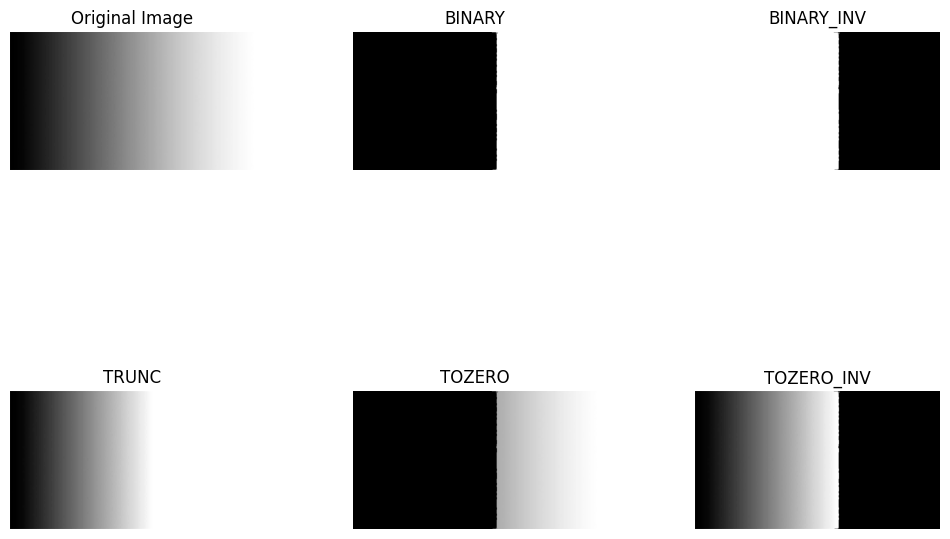

In [8]:
# Load the original grayscale image
original_image = cv2.imread('/content/drive/MyDrive/PCVK/Images/gradient.jpg', cv2.IMREAD_GRAYSCALE)

# Define the threshold value
threshold_value = 170

# Apply different types of thresholding
_, binary = cv2.threshold(original_image, threshold_value, 255, cv2.THRESH_BINARY)
_, binary_inv = cv2.threshold(original_image, threshold_value, 255, cv2.THRESH_BINARY_INV)
_, trunc = cv2.threshold(original_image, threshold_value, 255, cv2.THRESH_TRUNC)
_, tozero = cv2.threshold(original_image, threshold_value, 255, cv2.THRESH_TOZERO)
_, tozero_inv = cv2.threshold(original_image, threshold_value, 255, cv2.THRESH_TOZERO_INV)

# Display the results with spacing between each image
titles = ['Original Image', 'BINARY', 'BINARY_INV', 'TRUNC', 'TOZERO', 'TOZERO_INV']
images = [original_image, binary, binary_inv, trunc, tozero, tozero_inv]

plt.figure(figsize=(12, 8))
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')
    plt.subplots_adjust(wspace=0.4, hspace=0.4)  # Add space between images
plt.show()

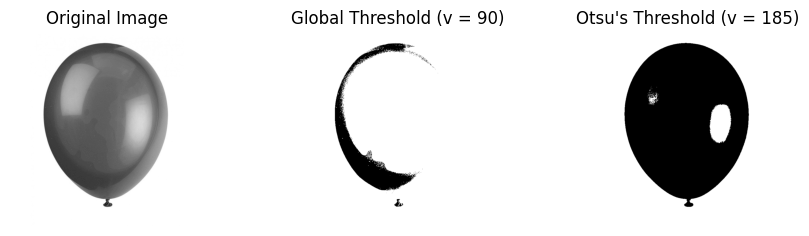

In [9]:
# Load the grayscale image
image = cv2.imread('/content/drive/MyDrive/PCVK/Images/balloon.jpg', cv2.IMREAD_GRAYSCALE)

# Function to calculate Otsu's threshold manually
def otsu_threshold(image):
    pixel_counts, bin_edges = np.histogram(image.ravel(), bins=256, range=(0, 256))
    total_pixels = image.size

    current_max, threshold = 0, 0
    sum_total, sum_foreground, sum_background = 0, 0, 0
    weight_foreground, weight_background = 0, 0

    # Total sum of pixel intensities
    for i in range(256):
        sum_total += i * pixel_counts[i]

    # Loop through all thresholds (1 to 255) to find the best threshold
    for t in range(256):
        weight_background += pixel_counts[t]
        if weight_background == 0:
            continue

        weight_foreground = total_pixels - weight_background
        if weight_foreground == 0:
            break

        sum_background += t * pixel_counts[t]
        mean_background = sum_background / weight_background
        mean_foreground = (sum_total - sum_background) / weight_foreground

        # Calculate between class variance
        between_class_variance = weight_background * weight_foreground * (mean_background - mean_foreground) ** 2

        # Find the threshold with maximum between class variance
        if between_class_variance > current_max:
            current_max = between_class_variance
            threshold = t

    return threshold

# Calculate the manual Otsu's threshold
otsu_thresh_value = otsu_threshold(image)

# Apply the thresholds to the image
_, global_thresh_image = cv2.threshold(image, 90, 255, cv2.THRESH_BINARY) # Example global threshold
_, otsu_thresh_image = cv2.threshold(image, otsu_thresh_value, 255, cv2.THRESH_BINARY)

# Display the results
titles = ['Original Image', 'Global Threshold (v = 90)', f"Otsu's Threshold (v = {otsu_thresh_value})"]
images = [image, global_thresh_image, otsu_thresh_image]

plt.figure(figsize=(10, 5))
for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')
    plt.subplots_adjust(wspace=0.5)  # Add space between images
plt.show()

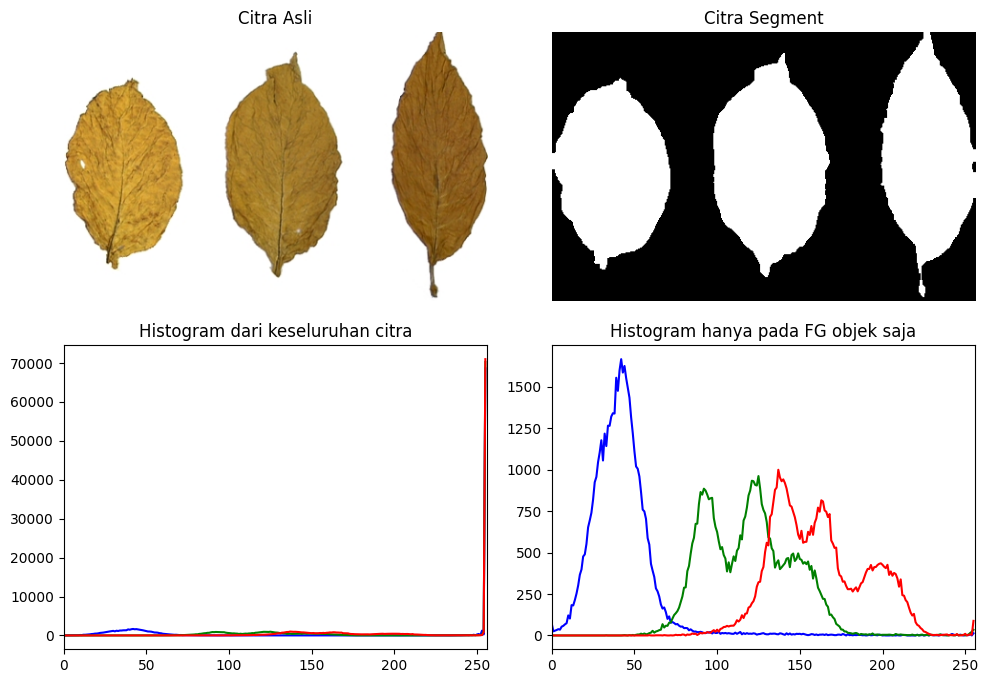

In [17]:
# Load the image
image = cv2.imread('/content/drive/MyDrive/PCVK/Images/tobacco.jpg')
# Calculate histogram for the entire image for each color channel
hist_full_image = []
colors = ('b', 'g', 'r')
for i, color in enumerate(colors):
    hist = cv2.calcHist([image], [i], None, [256], [0, 256])
    hist_full_image.append(hist)

# Plot the original image
plt.figure(figsize=(10, 7))

plt.subplot(2, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Citra Asli')
plt.axis('off')

# Plot the segmented image (mask)
# Assuming you already have 'mask' from previous segmentation code
plt.subplot(2, 2, 2)
plt.imshow(mask, cmap='gray')
plt.title('Citra Segment')
plt.axis('off')

# Plot histograms for each channel in the full image
plt.subplot(2, 2, 3)
for hist, color in zip(hist_full_image, colors):
    plt.plot(hist, color=color)
plt.title('Histogram dari keseluruhan citra')
plt.xlim([0, 256])

# Calculate and plot histogram for the masked (foreground) image
hist_masked_image = []
for i, color in enumerate(colors):
    hist = cv2.calcHist([image], [i], mask, [256], [0, 256])
    hist_masked_image.append(hist)

plt.subplot(2, 2, 4)
for hist, color in zip(hist_masked_image, colors):
    plt.plot(hist, color=color)
plt.title('Histogram hanya pada FG objek saja')
plt.xlim([0, 256])

plt.tight_layout()
plt.show()

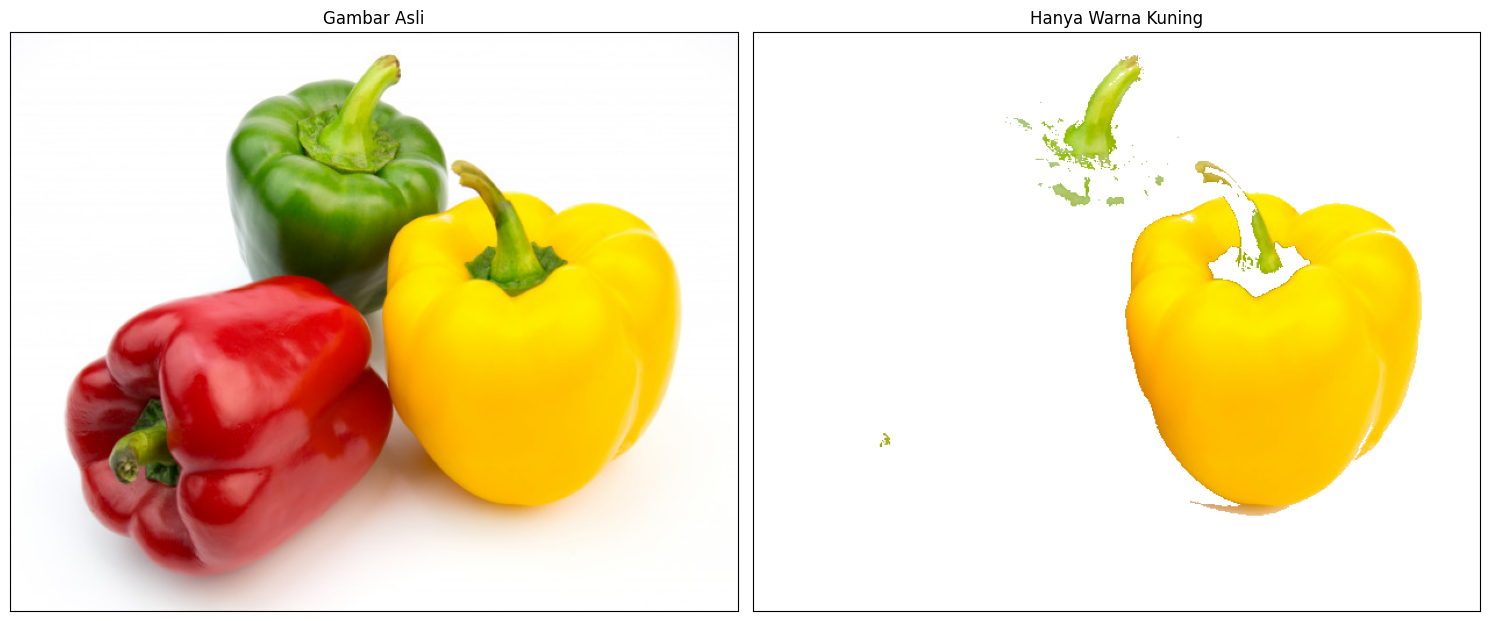

In [22]:
img = cv2.imread('/content/drive/MyDrive/PCVK/Images/peppers.jpg')

# Mengubah citra menjadi dua dimensi untuk K-Means clustering
Z = img.reshape((-1, 3))  # Mengubah menjadi vektor 2D dengan 3 channel warna
Z = np.float32(Z)  # Mengubah tipe data ke float32 untuk K-Means

# K-Means clustering
K = 3  # Kita akan membuat 3 klaster, kamu bisa sesuaikan dengan kebutuhan
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
_, labels, centers = cv2.kmeans(Z, K, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# Mengubah hasil klaster menjadi format gambar
centers = np.uint8(centers)  # Kembalikan pusat klaster ke format uint8 (warna asli)
segmented_img = centers[labels.flatten()]  # Buat gambar dari label yang terklasifikasi
segmented_img = segmented_img.reshape(img.shape)

# Menentukan rentang warna kuning dalam format BGR
# Kamu dapat menyesuaikan batas bawah dan atas sesuai dengan citra kamu
lower_yellow = np.array([0, 180, 180])  # Batas bawah warna kuning (BGR)
upper_yellow = np.array([50, 255, 255])  # Batas atas warna kuning (BGR)

# Masking: pilih hanya area yang sesuai dengan warna kuning
mask = cv2.inRange(segmented_img, lower_yellow, upper_yellow)
result = cv2.bitwise_and(img, img, mask=mask)

# Membuat bagian yang bukan warna kuning menjadi putih
result = img.copy()
result[mask == 0] = [255]

# Menampilkan gambar asli, gambar segmentasi dan hasil masking
plt.figure(figsize=(15,10))

# Gambar Asli
plt.subplot(121)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Gambar Asli')
plt.xticks([]), plt.yticks([])

# Gambar Hanya Warna Kuning
plt.subplot(122)
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.title('Hanya Warna Kuning')
plt.xticks([]), plt.yticks([])

plt.tight_layout()
plt.show()

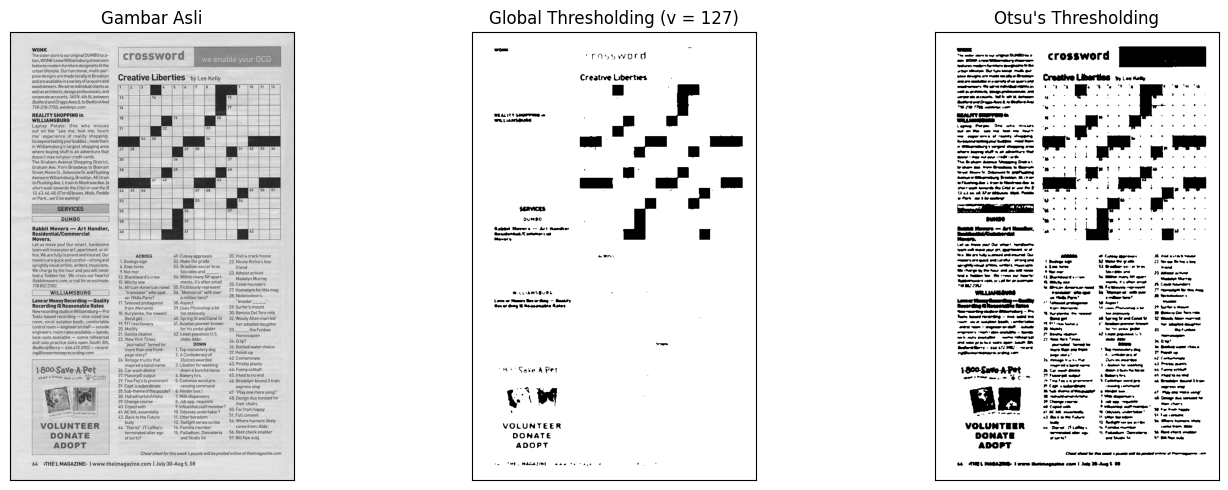

Nilai threshold yang dipilih oleh Otsu's Method: 171.0


In [23]:
filename = '/content/drive/MyDrive/PCVK/Images/crossword.jpg'
img = cv2.imread(filename, 0)

# Gaussian blur untuk mengurangi noise
blur = cv2.GaussianBlur(img, (5, 5), 0)

# Global Thresholding
thresh_value = 127  # Threshold global ditentukan secara manual
ret1, th1 = cv2.threshold(blur, thresh_value, 255, cv2.THRESH_BINARY)

# Otsu's Thresholding (tanpa menentukan threshold manual)
ret2, th2 = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Menampilkan hasil
titles = ['Gambar Asli', 'Global Thresholding (v = 127)', "Otsu's Thresholding"]
images = [img, th1, th2]

plt.figure(figsize=(15,5))

for i in range(3):
    plt.subplot(1,3,i+1)
    plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])

plt.tight_layout()
plt.show()

# Mencetak nilai threshold Otsu yang dipilih secara otomatis
print(f"Nilai threshold yang dipilih oleh Otsu's Method: {ret2}")